# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Data Pre-Processing
# Data Loading

In [2]:
df = pd.read_csv('Housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
print('Missing Values:\n', df.isna().sum())

Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [4]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']

for col in binary_columns:
    df[col] = df[col].map({'yes':1, 'no':0})
df    
    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


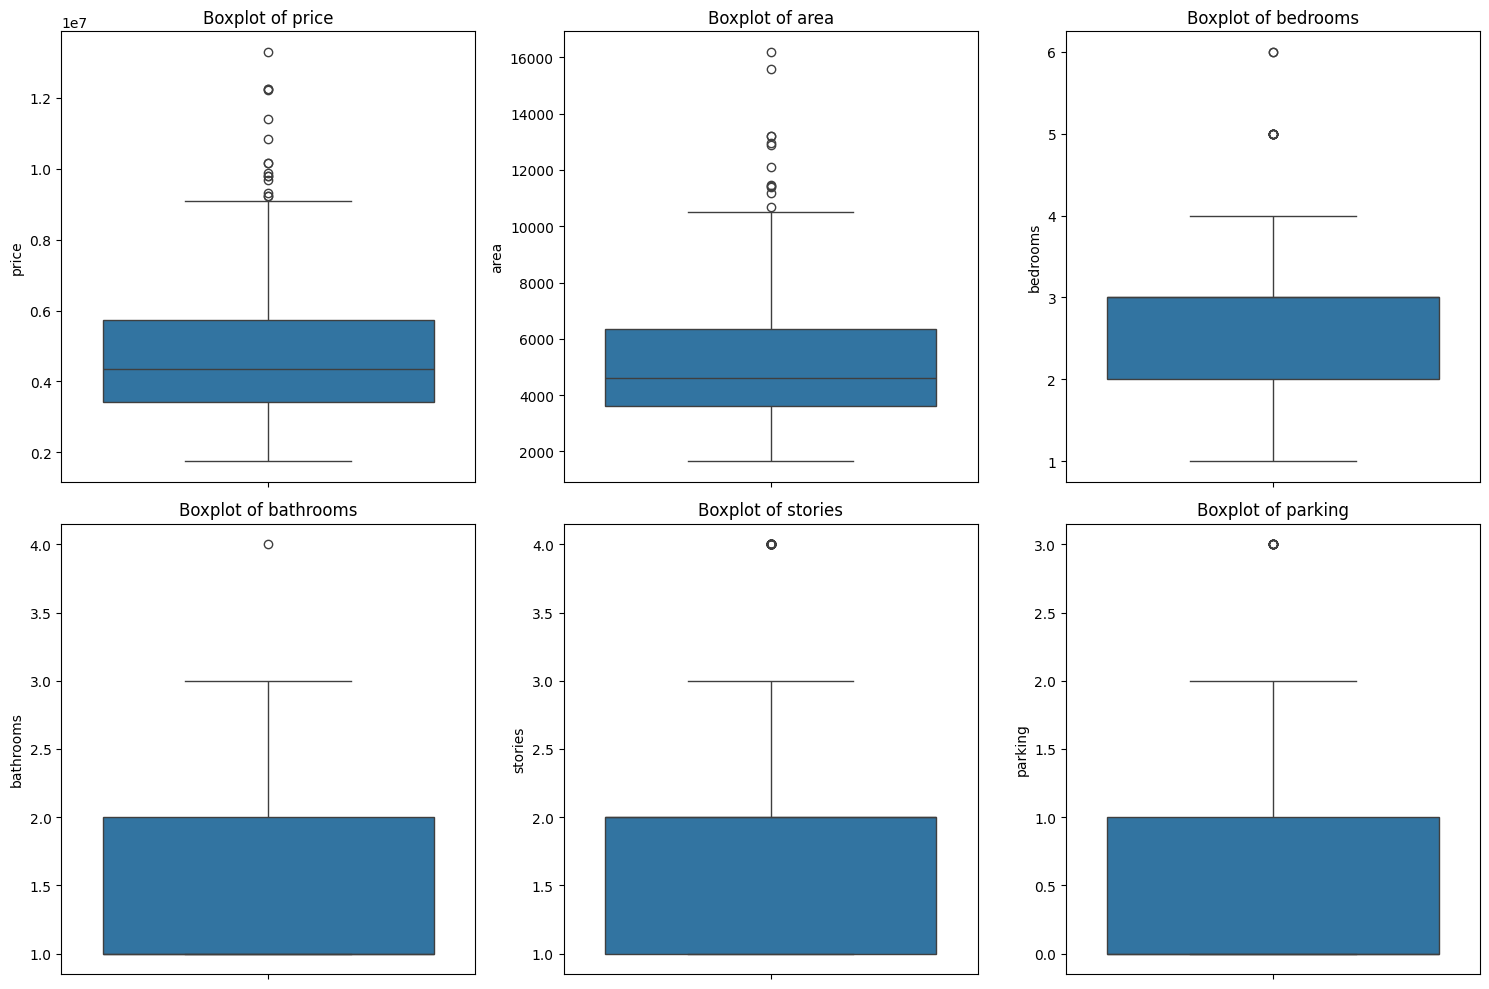

In [5]:
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns,1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
plt.savefig('Housing_boxplots.png')
plt.close()

In [6]:
numerical_cols = ['price','area', 'bedrooms', 'bathrooms','stories','parking']

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

IQR = Q3-Q1
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 * 1.5 *IQR))).any(axis=1)]
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,semi-furnished
14,9240000,7800,3,2,2,1,0,0,0,0,0,1,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1855000,2990,2,1,1,0,0,0,0,0,1,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [7]:
# one hot encoding

In [8]:
# df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)
# df

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,True,False
14,9240000,7800,3,2,2,1,0,0,0,0,0,1,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1855000,2990,2,1,1,0,0,0,0,0,1,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


# Preparing Data to Feed to the Model

In [9]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[0:7])

[[ 0.0092438   1.70356595 -0.45547559  0.61937351  0.51006137  2.39564823
   1.38727369 -0.2092153   1.83471992  1.58830956 -0.5        -0.83862787
  -0.75736653]
 [-0.35224548 -1.23852566 -0.45547559 -1.00779418  0.51006137 -0.41742355
  -0.72083829 -0.2092153  -0.54504232 -0.62960019  2.          1.192424
  -0.75736653]
 [ 0.32942001  0.23252014 -0.45547559  0.61937351  0.51006137  2.39564823
   1.38727369 -0.2092153  -0.54504232 -0.62960019  2.          1.192424
  -0.75736653]
 [-0.24896283  0.23252014 -0.45547559  0.61937351  0.51006137 -0.41742355
  -0.72083829 -0.2092153  -0.54504232  1.58830956 -0.5        -0.83862787
  -0.75736653]
 [-0.91513591 -1.23852566 -0.45547559 -1.00779418 -1.96054839 -0.41742355
  -0.72083829 -0.2092153  -0.54504232 -0.62960019 -0.5        -0.83862787
   1.32036466]
 [-0.54331838 -1.23852566 -0.45547559 -1.00779418  0.51006137 -0.41742355
  -0.72083829 -0.2092153   1.83471992 -0.62960019 -0.5        -0.83862787
   1.32036466]
 [ 0.68058102 -1.23852566 

# Training the Model

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [16]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nModel Performance:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Training R2: {train_r2:.2f}")
print(f"Testing R2: {test_r2:.2f}")


Model Performance:
Training RMSE: 824512.22
Testing RMSE: 1007707.51
Training R2: 0.66
Testing R2: 0.62


C:\Users\rakesh\AppData\Local\Temp\ipykernel_17608\220999337.py:34: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


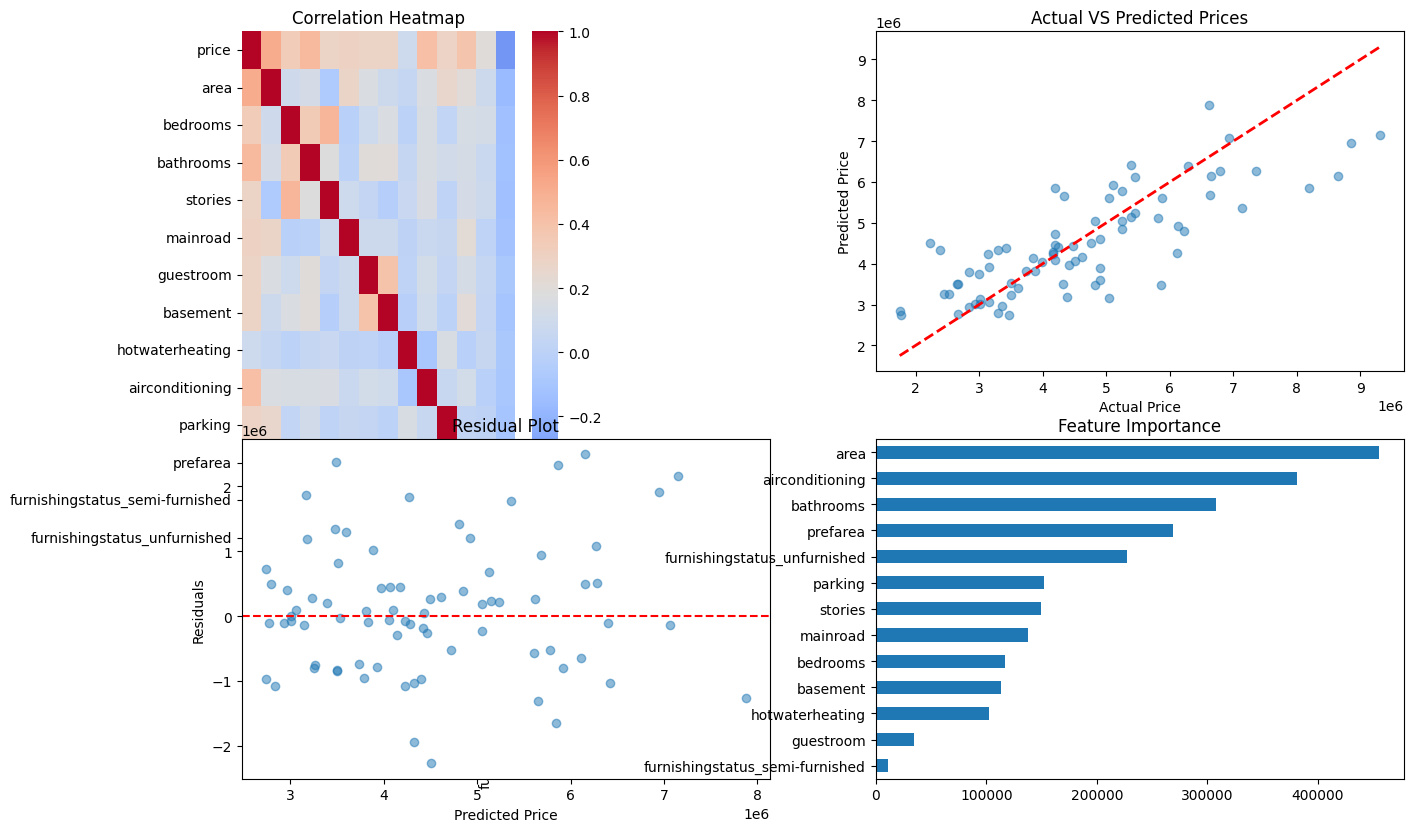

In [23]:
plt.figure(figsize=(15,15))

#correlation heatmap

plt.subplot(2,3,1)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')

#Scatter Plot
plt.subplot(3,2,2)
plt.scatter(y_test, y_test_pred,alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual VS Predicted Prices")

#Residual Scatter Plot
plt.subplot(3,2,3)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')


#Feature Importance
plt.subplot(3,2,4)
feature_importance = pd.Series(abs(model.coef_), index=df.drop('price', axis=1).columns)
feature_importance.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')

plt.tight_layout()
plt.savefig('Housing_regression_plots.png')
plt.show()